Library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Membership Function

In [ ]:
# membership function
servis = {
    'baik'   : [65.00, 80.00, 100.00, 100.00], 
    'cukup'   : [20.00, 40.00, 65.00, 80.00], 
    'buruk'   : [0.00,  0.00, 20.00, 40.00], 
}

harga = {
    'mahal'   : [5.00, 8.00, 10.00, 10.00],
    'sedang'   : [2.00,  5.00,  5.00, 8.00],
    'murah'   : [0.00,  0.00,  2.00,  5.00],
}

# output membership
peringkat_top10 = {'ya': 80, 'tidak': 40}

Membership Plot

In [ ]:
# visualisasi membership
def membership_plot(membership, xlabel, ylabel, label='', min=0, max=1):
    color = ['r', 'g', 'b']
    idx_color = 0
    for nilai_linguistik in membership:
        y = [0, 1, 1, 0]
        x = membership[nilai_linguistik]
        plt.plot((min, x[0]), (0,0))
        for i in range(len(x)-1):
            plt.plot((x[i], x[i+1]), (y[i], y[i+1]), color[idx_color])
        plt.plot((x[-1], max), (0,0), color[idx_color], label=nilai_linguistik)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        idx_color += 1
    plt.legend(loc=6)
    plt.show()

# visualisasi model sugeno
def sugeno_plot(membership):
  color = ['r', 'g']
  idx_color = 0
  
  for nilai_linguistik in membership:
    x = membership[nilai_linguistik]
    plt.plot((x, x), (0, 1), color[idx_color], label=nilai_linguistik)
    idx_color += 1
  plt.xticks([i for i in range(0,100,10)])
  plt.title("Model Sugeno")
  plt.legend(loc=6)
  plt.xlabel("Peringkat Top 10")
  plt.ylabel("\u03BC(x)")
  plt.show()

Fuzzyfication

In [ ]:
# fuzzyfication
def derajat_kebenaran(x, batas):
    if x < batas[0] or x > batas[3]:
        return 0
    elif x >= batas[1] and x <= batas[2]:
        return 1
    elif x >= batas[0] and x <= batas[1]:
        return (x-batas[0])/(batas[1]-batas[0])
    elif x >= batas[2] and x <= batas[3]: 
        return -1*(x-batas[3])/(batas[3]-batas[2])
    return 0

def nilai_fuzzy(x, membership):
    hasil = {}
    for nilai_linguistik in membership:
        hasil[nilai_linguistik] = derajat_kebenaran(x, membership[nilai_linguistik])
    return hasil

def fuzzyfication(x, list_membership) :
    x_fuzzyfication = []
    for i in range(len(list_membership)) :
        x_fuzzyfication.append(nilai_fuzzy(x[i], list_membership[i]))
    return x_fuzzyfication

Inference

In [ ]:
# inference
rule = {
    ('baik', 'mahal') : 'tidak',
    ('baik', 'sedang') : 'ya',
    ('baik', 'murah') : 'ya',
    ('cukup', 'mahal') : 'tidak',
    ('cukup', 'sedang') : 'tidak',
    ('cukup', 'murah') : 'tidak',
    ('buruk', 'mahal') : 'tidak',
    ('buruk', 'sedang') : 'tidak',
    ('buruk', 'murah') : 'tidak'
}

def inference(x_fuzzyfication, rule):
    x_inference = {}
    for l1, v1 in x_fuzzyfication[0].items():
        for l2, v2 in x_fuzzyfication[1].items():
            r = (l1,l2)
            min_value = min(v1, v2)
            current_value = x_inference.get(rule[r], 0)
            x_inference[rule[r]]= max(min_value, current_value)
    return x_inference

Defuzzification 

In [ ]:
# defuzzificcation (Sugeno)
def defuzzification(x_inference, membership):
    pembilang = 0
    penyebut = 0
    for nilai_linguistik in membership:
        pembilang = pembilang + x_inference[nilai_linguistik] * membership[nilai_linguistik]
        penyebut = penyebut + x_inference[nilai_linguistik]
    return pembilang/penyebut


Main Program

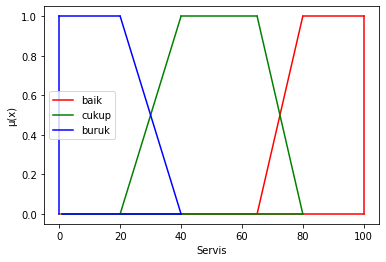

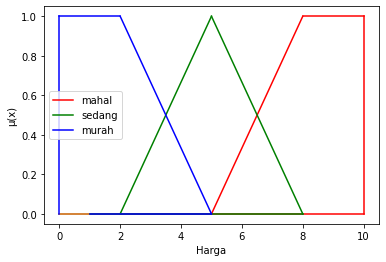

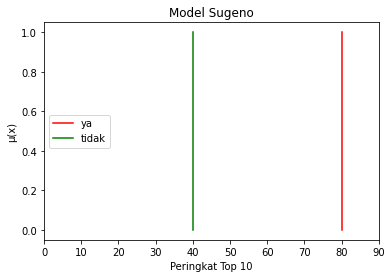

   id       skor
0   3  80.000000
1  13  80.000000
2  34  80.000000
3  52  80.000000
4  91  80.000000
5  92  80.000000
6  15  74.666667
7  16  66.666667
8  60  66.666667
9  17  53.333333


In [ ]:
# create membership plot
membership_plot(servis, 'Servis', '\u03BC(x)')
membership_plot(harga, 'Harga', '\u03BC(x)')
sugeno_plot(peringkat_top10)

# read data dari file bengkel.xlsx
dfs = pd.read_excel('bengkel.xlsx')
dfs = dfs[['servis', 'harga']]
data = dfs.values

# fuzzy systems
skor_test = []
for x in data : 
    x_fuzzyfication = fuzzyfication(x, [servis, harga])
    x_inference = inference(x_fuzzyfication, rule)
    x_defuzzification = defuzzification(x_inference, peringkat_top10)
    skor_test.append(x_defuzzification)
skor_test = dict(zip([i for i in range(1, 101)], skor_test))

# placement peringkat 10 terbaik
skor_test = {k: v for k, v in sorted(skor_test.items(), key=lambda item: item[1], reverse=True)}
peringkat_top10 = dict(list(skor_test.items())[:10])

# output ke file peringkat.xlsx
output = pd.DataFrame(peringkat_top10.items(), columns=['id', 'skor'])
print(output)
output.to_excel('peringkat.xlsx')